# Recuperação da curva de maré a partir da Tábua de Marés (.pdf) fornecida pelo IH e criação de arquivo .tid (CARIS HIPS and SIPS tidal file).

### Resumo

A Proposta do seguinte trabalho é:

(1) Converter um arquivo .pdf de uma dada Tábua de Marés para pandas DataFrame;
(2) Recuperar através de interpolação por spline cúbica o comportamento da curva de maré; e
(3) Criação de arquivo .tid.

A Tábua de Marés foi obtida através do site https://www.hidrografico.pt/tabelamares, a qual é enviada por email em formato pdf. 

Todos objetivos foram cumpridos de forma consistente. Para validar a consistência da conversão pdf para dataframe, ao fim várias tábuas de distintos portos e épocas do ano foram importadas e convertidas. Para todas, foi alcançado o mesmo resultado.

A consistência da abordagem foi validada pela importação de Tábuas de Marés distintas, variando o porto e a época do ano. Em todos os casos o algoritmo obteve a mesma performance.

Ao fim, uma função foi feita para agilizar as validações e agregar a metodologia.

### Ferramentas Utilizadas

pip install numpy pandas matplotlib PyPDF2 


### Estratégia

Para recuperação da maré, foi criada função com os seguintes inputs: (1) path do arquivo (str), (2) página do PDF (int), (3) mês de início (int), (4) mês de fim (int) e (5) ano (int). Os outputs são: gráfico %matplotlib inline e coordenadas (X,Y) da recuperação da maré com amostragem de 1 em 1 minuto.

Para a criação do arquivo tid, somente formatei o dataframe de acordo com os padrões do arquivo tid. 

### A metodologia (para aplicações (1) e (2))

Para esta aplicação inicial, foi escolhida uma Tábua de Porto, ano 2021, primeiro trimestre.

Por padrão, a Tábua de Marés é sempre a terceira página. Segue o devido exemplo da utilizada:

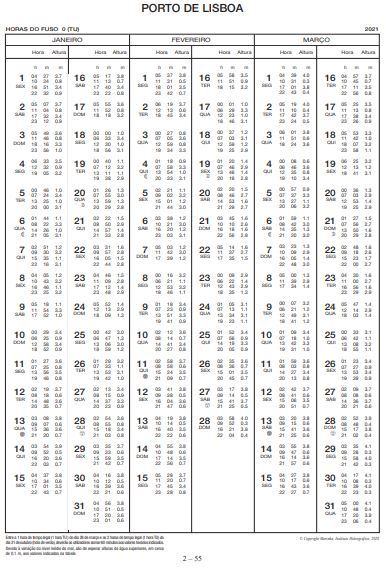

#### Abertura do dado bruto:

In [1]:
import PyPDF2
root = "PRT_16_1_2021.pdf"
pdfFileObj = open(root, 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
pageObj = pdfReader.getPage(2)
page = pageObj.extractText()
page

'2 Œ 55PORTO DE LISBOA\n04 27 3.710 24 0.816 51 3.422 32 0.9    05 07 3.711 04 0.817 32 3.423 12 0.9    05 49 3.611 46 0.818 16 3.323 56 1.0    06 33 3.512 32 0.919 05 3.2        00 46 1.007 24 3.413 25 1.020 00 3.1    01 44 1.108 22 3.314 26 1.021 05 3.1    02 51 1.209 30 3.215 35 1.122 16 3.1    04 05 1.210 43 3.216 46 1.123 25 3.2    05 18 1.111 54 3.317 52 1.0        00 29 3.406 25 0.912 58 3.418 52 0.9    01 27 3.607 25 0.813 56 3.519 46 0.8    02 19 3.708 18 0.614 48 3.620 35 0.7    03 08 3.809 07 0.615 36 3.621 20 0.7    03 54 3.909 52 0.516 20 3.622 03 0.7    04 37 3.810 34 0.617 01 3.522 43 0.7         05 17 3.811 13 0.717 40 3.423 22 0.8    05 55 3.611 52 0.818 18 3.2        00 00 1.006 33 3.412 30 1.018 56 3.1    00 40 1.107 12 3.213 11 1.119 38 2.9    01 26 1.307 55 3.013 59 1.320 29 2.8    02 22 1.508 50 2.914 57 1.421 33 2.8    03 31 1.609 57 2.816 05 1.522 44 2.8    04 46 1.511 09 2.817 12 1.423 48 2.9    05 52 1.412 13 2.918 09 1.3        00 42 3.006 47 1.313 06 3.018 5

Notei que, comparando outros .PDFs, há sempre a string '\n' precedendo o dado de interesse. Portanto, a seguir eu identifiquei a posição da string e eliminei os caracteres anteriores.

In [2]:
page = page[page.find('\n')+1:] 
print(f'O tipo de dado é: {type(page)}')
print(f'Quantidade de caracteres na string: {len(page)}')
page

O tipo de dado é: <class 'str'>
Quantidade de caracteres na string: 3570


'04 27 3.710 24 0.816 51 3.422 32 0.9    05 07 3.711 04 0.817 32 3.423 12 0.9    05 49 3.611 46 0.818 16 3.323 56 1.0    06 33 3.512 32 0.919 05 3.2        00 46 1.007 24 3.413 25 1.020 00 3.1    01 44 1.108 22 3.314 26 1.021 05 3.1    02 51 1.209 30 3.215 35 1.122 16 3.1    04 05 1.210 43 3.216 46 1.123 25 3.2    05 18 1.111 54 3.317 52 1.0        00 29 3.406 25 0.912 58 3.418 52 0.9    01 27 3.607 25 0.813 56 3.519 46 0.8    02 19 3.708 18 0.614 48 3.620 35 0.7    03 08 3.809 07 0.615 36 3.621 20 0.7    03 54 3.909 52 0.516 20 3.622 03 0.7    04 37 3.810 34 0.617 01 3.522 43 0.7         05 17 3.811 13 0.717 40 3.423 22 0.8    05 55 3.611 52 0.818 18 3.2        00 00 1.006 33 3.412 30 1.018 56 3.1    00 40 1.107 12 3.213 11 1.119 38 2.9    01 26 1.307 55 3.013 59 1.320 29 2.8    02 22 1.508 50 2.914 57 1.421 33 2.8    03 31 1.609 57 2.816 05 1.522 44 2.8    04 46 1.511 09 2.817 12 1.423 48 2.9    05 52 1.412 13 2.918 09 1.3        00 42 3.006 47 1.313 06 3.018 59 1.2    01 29 3.207 33

Observa-se que o output bruto dos dados é em formato de string única, com 3570 caracteres.

#### Corrigindo tabulação e ordenando em lista

Note que, no .pdf original, todas as medições contém somente uma casa decimal de precisão. Entretanto, se observarmos o output abaixo, percebemos que há números com 3 casas decimais:

In [3]:
page[0:30]

'04 27 3.710 24 0.816 51 3.422 '

Na verdade, o que está ocorrendo é que na quebra de página do .pdf os números último da página anterior e primeiro da seguinte ficam colados. Essa questão é resolvida abaixo:

In [4]:
# Organizando dado
page = page.replace(' ',',')
page = page.replace(',,','\n')
page = page.replace(',,,','\n')
page = page.replace(',,,,','\n')
page = page.replace(',,,,,','\n')
page = page.replace(',,,,,,','\n')
page = page.replace(',,,,,,,','\n')
page = page.replace(',,,,,,,,','\n')
page = page.replace(',,,,,,,,,','\n')
lista=page.split()

# Separando dados que apareceram juntos no \n do pdf 
for i in range(len(lista)):
    for j in range(lista[i].count('.')-1):
        ind = [idx for idx, item in enumerate(lista[i].lower()) if '.' in item][j]
        lista[i] = lista[i][:ind+2] + ',' + lista[i][ind+2:]
print(f'O tamanho da lista é {len(lista)}.')
lista[0:10]

O tamanho da lista é 90.


['04,27,3.7,10,24,0.8,16,51,3.4,22,32,0.9',
 '05,07,3.7,11,04,0.8,17,32,3.4,23,12,0.9',
 '05,49,3.6,11,46,0.8,18,16,3.3,23,56,1.0',
 '06,33,3.5,12,32,0.9,19,05,3.2',
 '00,46,1.0,07,24,3.4,13,25,1.0,20,00,3.1',
 '01,44,1.1,08,22,3.3,14,26,1.0,21,05,3.1',
 '02,51,1.2,09,30,3.2,15,35,1.1,22,16,3.1',
 '04,05,1.2,10,43,3.2,16,46,1.1,23,25,3.2',
 '05,18,1.1,11,54,3.3,17,52,1.0',
 '00,29,3.4,06,25,0.9,12,58,3.4,18,52,0.9']

A presente lista mostra um dia para cada linha, totalizando 90 medições (3 meses).

#### Convertendo lista em DataFrame para manipulação

Na etapa anterior, tem-se um elemento da lista para cada dia. Agora, a proposta é separar (para cada dia) todas as medições e seus horários.

In [5]:
# Transformando em dataframe
import pandas as pd
df = pd.DataFrame(lista,columns=['h'])
df[['h','min','m','h1','min1','m1','h2','min2','m2','h3','min3','m3','h4']] = df['h'].str.split(',',expand=True)
    
# corrigindo o dataframe
import numpy as np

# Pequena correção de deslocamento dos dados em determinada linha.
def shift(arr, num, fill_value=0):
    result = np.empty_like(arr)
    if num > 0:
        result[:num] = fill_value
        result[num:] = arr[:-num]
    elif num < 0:
        result[num:] = fill_value
        result[:num] = arr[-num:]
    else:
        result[:] = arr
    return result

for i in np.where(df.h=='')[0]:
    df.iloc[i] = shift(df.iloc[i],-1)
del df['h4']

df

,h,min,m,h1,min1,m1,h2,min2,m2,h3,min3,m3
0,04,27,3.7,10,24,0.8,16,51,3.4,22,32,0.9
1,05,07,3.7,11,04,0.8,17,32,3.4,23,12,0.9
2,05,49,3.6,11,46,0.8,18,16,3.3,23,56,1.0
3,06,33,3.5,12,32,0.9,19,05,3.2,None,None,None
4,00,46,1.0,07,24,3.4,13,25,1.0,20,00,3.1
...,...,...,...,...,...,...,...,...,...,...,...,...
85,02,09,3.7,08,08,0.6,14,36,3.7,20,21,0.6
86,02,52,3.9,08,48,0.4,15,17,3.8,21,02,0.4
87,03,35,4.1,09,28,0.3,15,58,4.0,21,42,0.3
88,04,17,4.1,10,08,0.3,16,39,4.0,22,23,0.3


As colunas 'h' representam a hora;
As colunas 'min' representam os minutos; e
As colunas 'm' representam a altura em metros da maré.

Como a maré em Portugal é semidiurna, com período médio de 12h25, é percebido que alguns dias só possuem 2 PM e 1 BM ou 1 PM e 2 BM. Isso é registrado como 'None' nos campos h3, min3 e m3 (correspondentes à quarta medição do dia).

#### Criação do Tábua de Maré em formato de DataFrame

Nessa etapa foi utilizada a biblioteca datetime para criar o vetor de tempo.

In [6]:
# Criando vetor datetime e vetor alturas de maré
mes_inicio = '1'
mes_fim = '4'
ano = '2021'
import datetime
lista_dates = []
lista_alturas = []
count=0
for i in np.arange(int(mes_inicio),int(mes_fim)):
    for j in range(len(pd.date_range(start=str(i)+'/1/'+ano, end=str(i+1)+'/01/'+ano)[0:-1])):
        
        lista_dates.append(datetime.datetime(int(ano), i, j+1, int(df['h'][count]), int(df['min'][count])))
        lista_alturas.append(df['m'][count])
        lista_dates.append(datetime.datetime(int(ano), i, j+1, int(df['h1'][count]), int(df['min1'][count])))
        lista_alturas.append(df['m1'][count])
        lista_dates.append(datetime.datetime(int(ano), i, j+1, int(df['h2'][count]), int(df['min2'][count])))
        lista_alturas.append(df['m2'][count])
        try:
            lista_dates.append(datetime.datetime(int(ano), i, j+1, int(df['h3'][count]), int(df['min3'][count])))
            lista_alturas.append(df['m3'][count])
        except:
            pass
        count = count+1

# Criando dataframe final a partir das duas listas
res = pd.DataFrame(lista_alturas, index=lista_dates,columns=['Altura'])
res = res.dropna()
res.Altura = res.Altura.astype(float)
res

,Altura
2021-01-01 04:27:00,3.7
2021-01-01 10:24:00,0.8
2021-01-01 16:51:00,3.4
2021-01-01 22:32:00,0.9
2021-01-02 05:07:00,3.7
...,...
2021-03-30 22:23:00,0.3
2021-03-31 05:00:00,4.1
2021-03-31 10:48:00,0.4
2021-03-31 17:20:00,3.9


#### Interpolação via Spline Cúbica

In [7]:
import scipy.interpolate
cs = scipy.interpolate.CubicSpline(res.index,res.Altura, axis=0)
x = np.arange(res.index[0],res.index[-1], datetime.timedelta(minutes=1))
x = pd.to_datetime(x)

Aqui, temos uma funçao cs(x) que gera, para um dado vetor datetime (x), as respostas em altura de acordo com a spline cúbica.

#### Plot da recuperação do comportamento ondulatório da maré

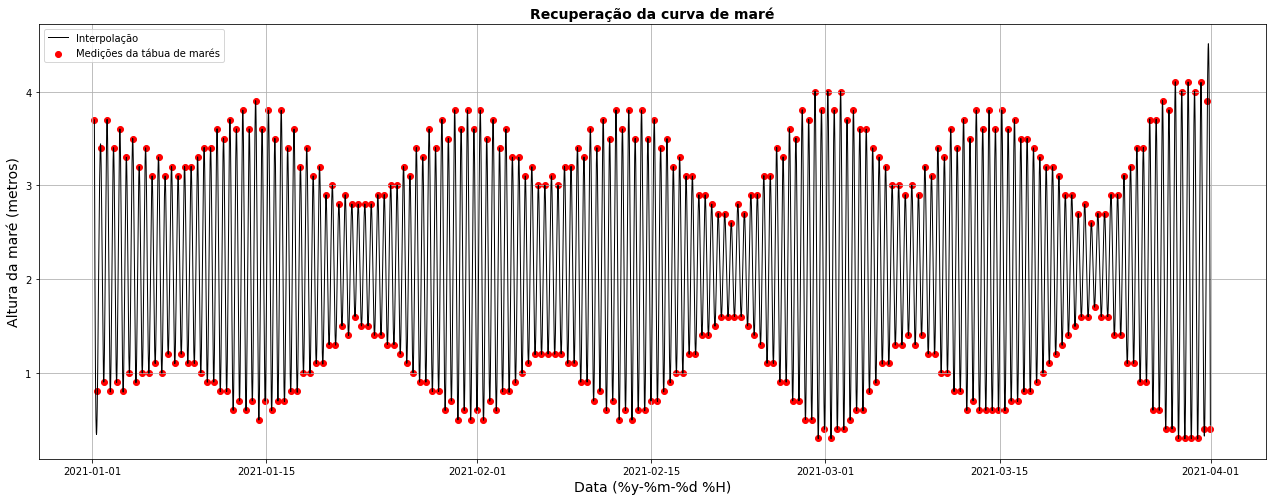

In [8]:
# Plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(22,8))
plt.plot(x,cs(x),color='black',linewidth=1,label='Interpolação')
plt.scatter(res.index,res.Altura,color='red',label='Medições da tábua de marés')
plt.title('Recuperação da curva de maré', fontsize=14,fontweight='bold')
plt.xlabel('Data (%y-%m-%d %H)',fontsize=14)
plt.ylabel('Altura da maré (metros)',fontsize=14)
plt.legend()
plt.grid()
plt.show()

#### Plot parcial

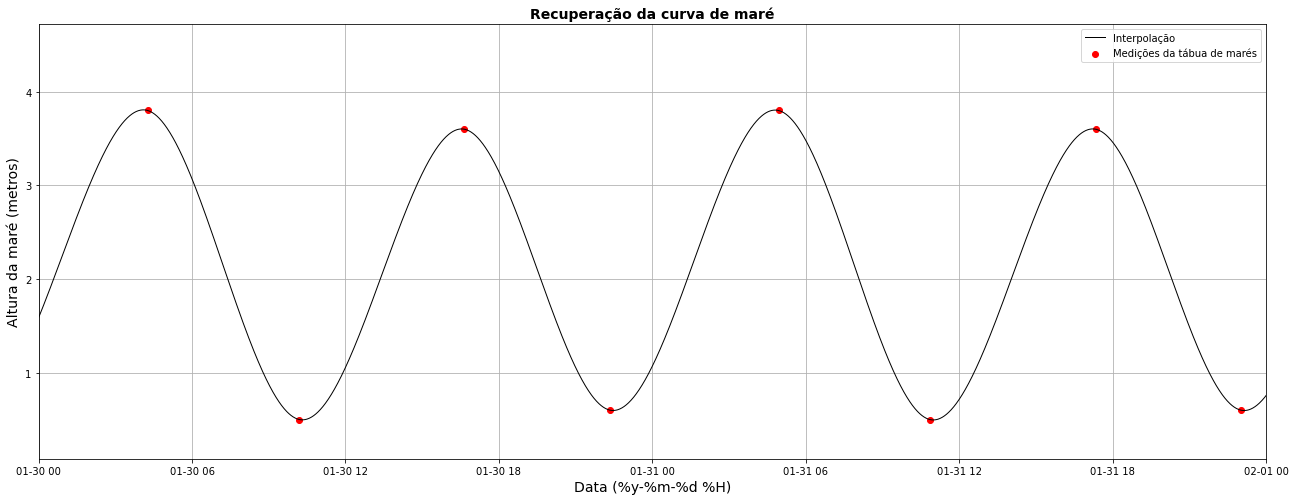

In [9]:
# Qual intervalo se deseja analisar?
dia_inicio = 30
mes_inicio = 1
dia_fim = 1
mes_fim = 2

# Plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(22,8))
plt.plot(x,cs(x),color='black',linewidth=1,label='Interpolação')
plt.xlim([datetime.date(int(ano), mes_inicio, dia_inicio),
          datetime.date(int(ano), mes_fim, dia_fim)])
plt.scatter(res.index,res.Altura,color='red',label='Medições da tábua de marés')
plt.title('Recuperação da curva de maré', fontsize=14,fontweight='bold')
plt.xlabel('Data (%y-%m-%d %H)',fontsize=14)
plt.ylabel('Altura da maré (metros)',fontsize=14)
plt.legend()
plt.grid()
plt.show()

### Resultado: Criação de função para validação com outros .PDFs.

A função gera output do plot interativo da curva de maré recuperada, assim como os pontos (x_,y_) da maré recuperada.

In [10]:
def shift(arr, num, fill_value=0):
    
    import numpy as np
    
    result = np.empty_like(arr)
    if num > 0:
        result[:num] = fill_value
        result[num:] = arr[:-num]
    elif num < 0:
        result[num:] = fill_value
        result[:num] = arr[-num:]
    else:
        result[:] = arr
    return result

def rec_mare(root_input,pag,mes_inicio,mes_fim,ano):
    
    import PyPDF2
    import pandas as pd
    import datetime
    import numpy as np
    import scipy.interpolate
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    pdfFileObj = open(root_input, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pageObj = pdfReader.getPage(pag-1)
    page = pageObj.extractText()
    page = page[page.find('\n')+1:] 
    # Organizando dado
    page = page.replace(' ',',')
    page = page.replace(',,','\n')
    page = page.replace(',,,','\n')
    page = page.replace(',,,,','\n')
    page = page.replace(',,,,,','\n')
    page = page.replace(',,,,,,','\n')
    page = page.replace(',,,,,,,','\n')
    page = page.replace(',,,,,,,,','\n')
    page = page.replace(',,,,,,,,,','\n')
    lista=page.split()
    # Separando dados que apareceram juntos no \n do pdf 
    for i in range(len(lista)):
        for j in range(lista[i].count('.')-1):
            ind = [idx for idx, item in enumerate(lista[i].lower()) if '.' in item][j]
            lista[i] = lista[i][:ind+2] + ',' + lista[i][ind+2:]
    # Transformando em dataframe
    df = pd.DataFrame(lista,columns=['h'])
    df[['h','min','m','h1','min1','m1','h2','min2','m2','h3','min3','m3','h4']] = df['h'].str.split(',',expand=True)
    # corrigindo o dataframe
    for i in np.where(df.h=='')[0]:
        df.iloc[i] = shift(df.iloc[i],-1)
    del df['h4']            
    # Criando vetor datetime e vetor alturas de maré
    lista_dates = []
    lista_alturas = []
    count=0
    for i in np.arange(int(mes_inicio),int(mes_fim)):
        for j in range(len(pd.date_range(start=str(i)+'/1/'+ano, end=str(i+1)+'/01/'+ano)[0:-1])):
            lista_dates.append(datetime.datetime(int(ano), i, j+1, int(df['h'][count]), int(df['min'][count])))
            lista_alturas.append(df['m'][count])
            lista_dates.append(datetime.datetime(int(ano), i, j+1, int(df['h1'][count]), int(df['min1'][count])))
            lista_alturas.append(df['m1'][count])
            lista_dates.append(datetime.datetime(int(ano), i, j+1, int(df['h2'][count]), int(df['min2'][count])))
            lista_alturas.append(df['m2'][count])
            try:
                lista_dates.append(datetime.datetime(int(ano), i, j+1, int(df['h3'][count]), int(df['min3'][count])))
                lista_alturas.append(df['m3'][count])
            except:
                pass
            count = count+1
    # Criando dataframe final a partir das duas listas
    res = pd.DataFrame(lista_alturas, index=lista_dates,columns=['Altura'])
    res = res.dropna()
    res.Altura = res.Altura.astype(float)
    # Criação da interpolação via spline cúbica
    cs = scipy.interpolate.CubicSpline(res.index,res.Altura, axis=0)
    x = np.arange(res.index[0],res.index[-1], datetime.timedelta(minutes=1))
    x = pd.to_datetime(x)
    # Plot
    plt.figure(figsize=(22,8))
    plt.plot(x,cs(x),color='black',linewidth=1,label='Interpolação')
    plt.scatter(res.index,res.Altura,color='red',label='Medições da tábua de marés')
    plt.title('Recuperação da curva de maré', fontsize=14,fontweight='bold')
    plt.xlabel('Data (%y-%m-%d %HH)',fontsize=14)
    plt.ylabel('Altura da maré (metros)',fontsize=14)
    plt.legend()
    plt.grid()
    plt.show()
    return x,cs(x)

### Teste: primeiro trimestre de 2021 - porto de Lisboa

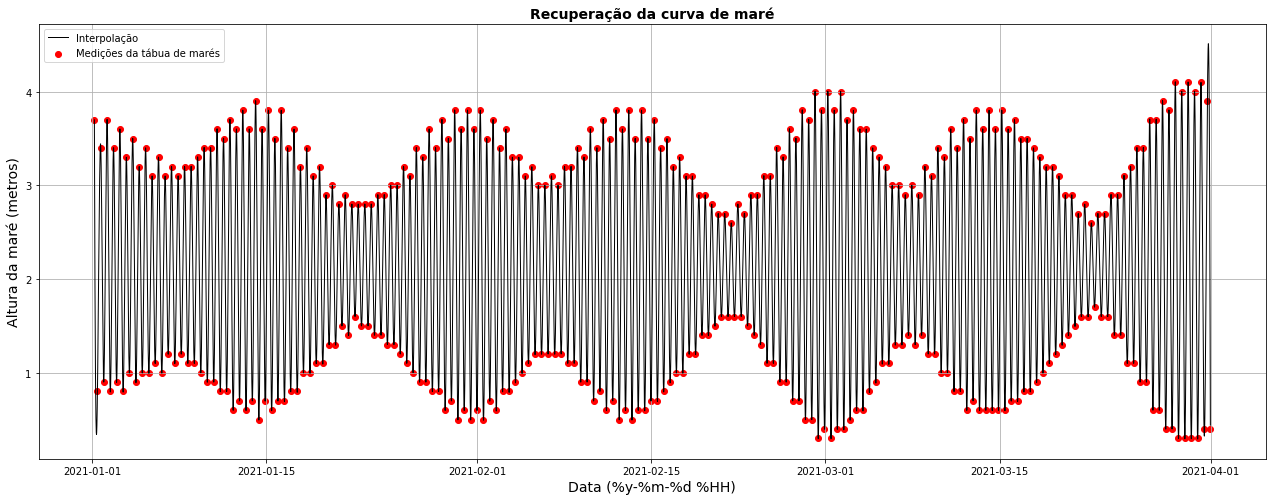

In [11]:
root_input = "PRT_16_1_2021.pdf"
pag = 3
mes_inicio = '1'
mes_fim = '4'
ano = '2021'
x_, y_ = rec_mare(root_input,pag,mes_inicio,mes_fim,ano)

### Teste: segundo trimestre de 2021 - porto de Lisboa

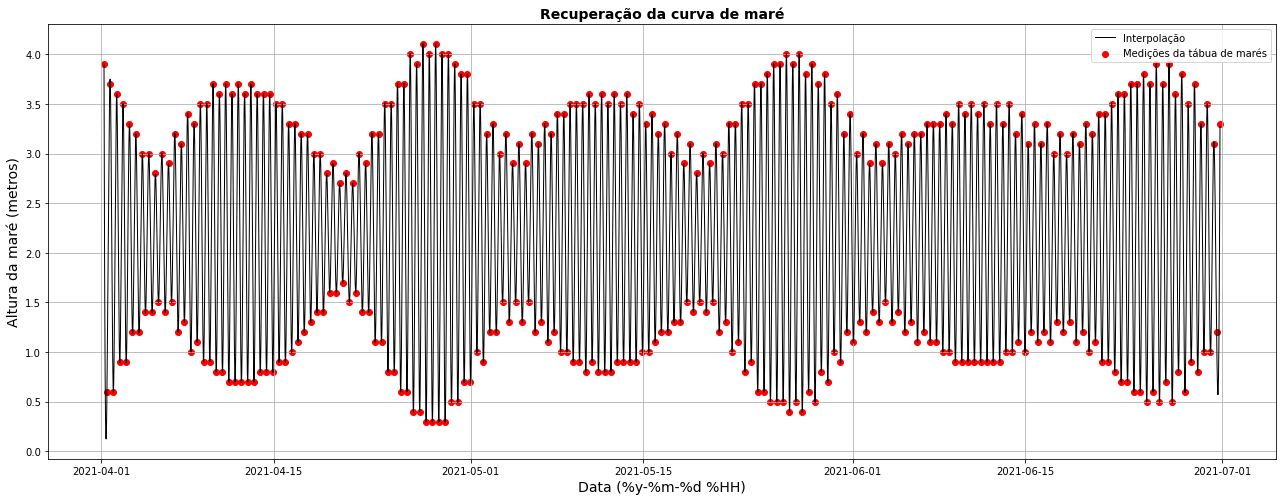

In [12]:
root_input = "PRT_16_2_2021.pdf"
pag = 3
mes_inicio = '4'
mes_fim = '7'
ano = '2021'
x_, y_ = rec_mare(root_input,pag,mes_inicio,mes_fim,ano)

### Teste: terceiro trimestre de 2021 - porto de Lisboa

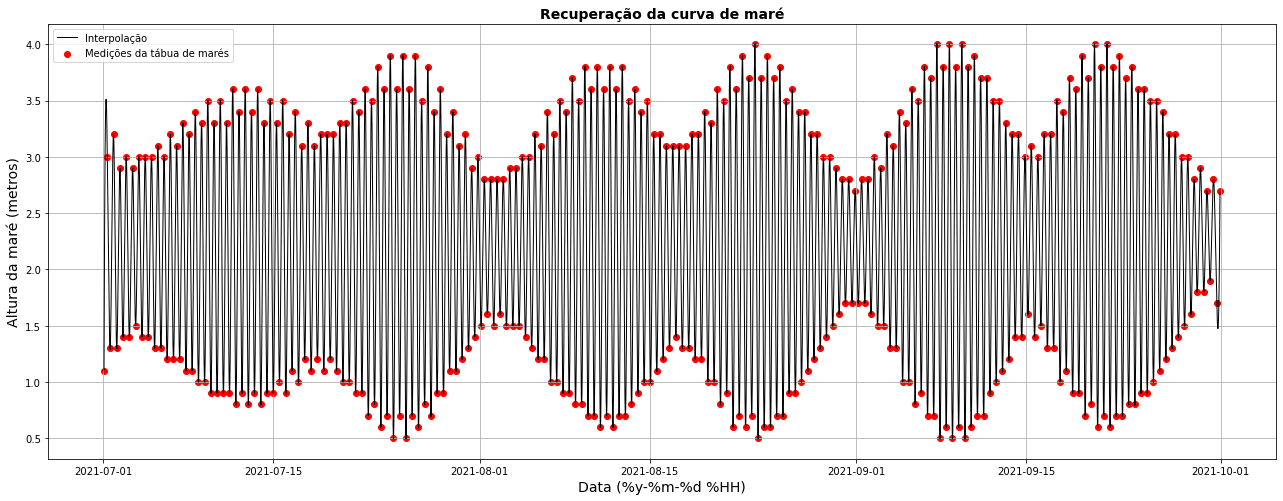

In [13]:
root_input = "PRT_16_3_2021.pdf"
pag = 3
mes_inicio = '7'
mes_fim = '10'
ano = '2021'
x_, y_ = rec_mare(root_input,pag,mes_inicio,mes_fim,ano)

### Teste: primeiro trimestre de 2021 - porto de Cascais

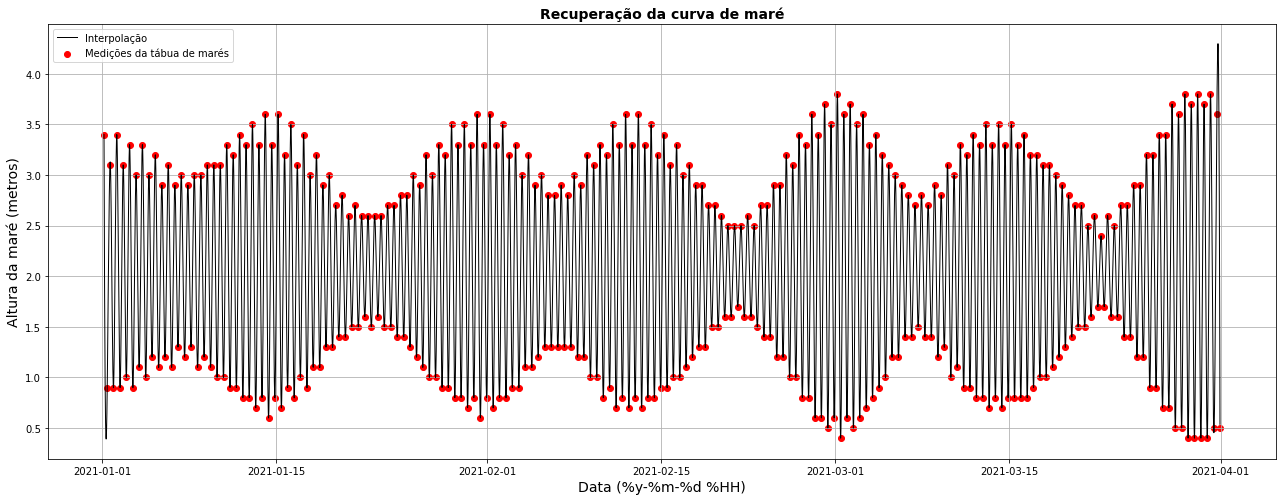

In [14]:
root_input = "PRT_15_1_2021.pdf"
pag = 3
mes_inicio = '1'
mes_fim = '4'
ano = '2021'
x_, y_ = rec_mare(root_input,pag,mes_inicio,mes_fim,ano)

### Teste: primeiro trimestre de 2021 - porto de Ponta Delgada (Açores)

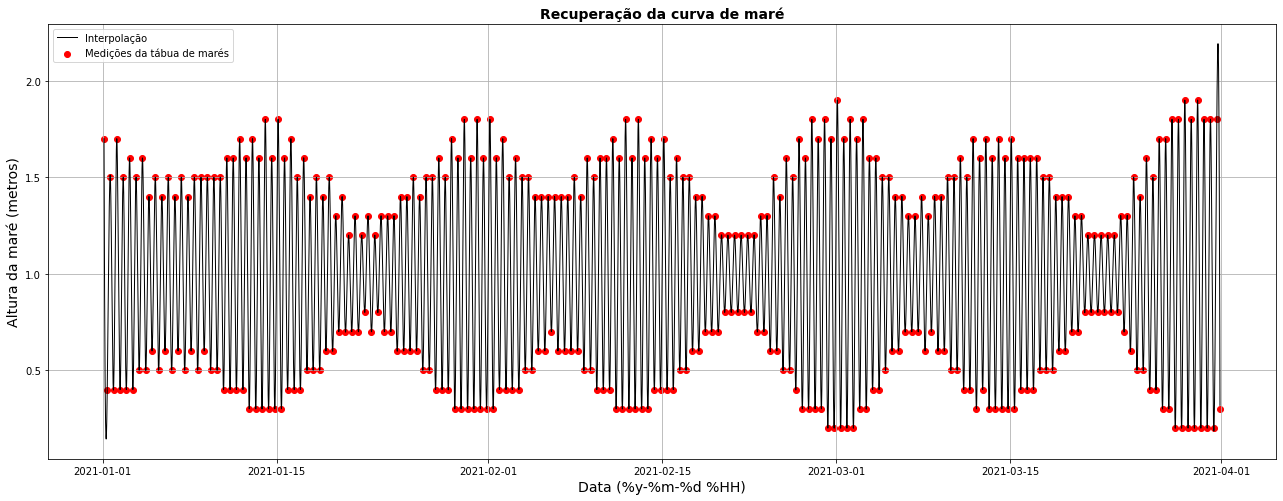

In [15]:
root_input = "PRT_211_1_2021.pdf"
pag = 3
mes_inicio = '1'
mes_fim = '4'
ano = '2021'
x_, y_ = rec_mare(root_input,pag,mes_inicio,mes_fim,ano)

### Construção do arquivo .tid

De acordo com o Caris Reference Guide v8.1, página 148, o modelo padrão de um arquivo .tid é:

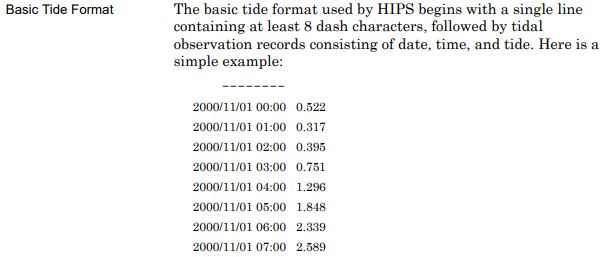

Ajustando formatação:

In [16]:
a = pd.DataFrame(x)
b = pd.DataFrame(cs(x))
tide = pd.concat([a,b],axis=1)
tide.columns=['datetime','h']
tide.datetime = tide.datetime.dt.strftime('%Y/%m/%d %H:%M')
tide.h = np.round(tide.h,3)
tide.rename(columns = {'datetime':'--------', 'h':' '}, inplace = True)
root_tid = "tide.txt"
tide.to_csv(root_tid,index=False,header=True,sep=' ',quoting=None)
tide

,--------,
0,2021/01/01 04:27,3.700
1,2021/01/01 04:28,3.669
2,2021/01/01 04:29,3.638
3,2021/01/01 04:30,3.607
4,2021/01/01 04:31,3.577
...,...,...
129274,2021/03/31 23:01,0.596
129275,2021/03/31 23:02,0.557
129276,2021/03/31 23:03,0.518
129277,2021/03/31 23:04,0.479


Pronto! tabela formatada e pronta para exportação, com argumentos header=True, index=False e quoting=None. Não tenho acesso ao software CARIS HIPS and SIPS para validar esse txt. Mas, havendo qlqr tipo de incompatibilidade, posso substituir o delimitador para ','.

### Conclusão

Todos objetivos forarm alcançados com consistência. Essa abordagem pode ser feita para marés previstas por exemplo, criando arquivo .tid para sondagens que não podem dispor de informação de maré em tempo real.